## Importation des bibliothèques nécessaires et du dataset

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/CO2-Emissions.csv')
df.info()

#Ajout d'un thème
sns.set_theme()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
 12  Date  

## Problématique : Quels sont les véhicules les plus polluants au Canada ?

## Consommation de carburant en fonction du nombres de cylindres du véhicule

Text(0.5, 1.0, 'Consommation de carburant en fonction du nombres de cylindres du véhicule')

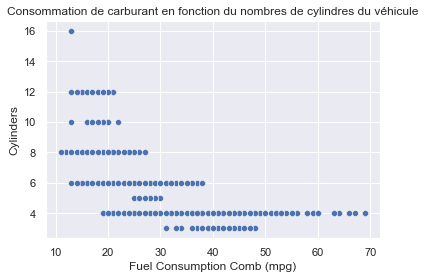

In [81]:
# Consommation de carburant en L/100 km

sns.scatterplot(x="Fuel Consumption Comb (mpg)", y="Cylinders", data= df)
plt.title('Consommation de carburant en fonction du nombres de cylindres du véhicule')

# Le véhicule ayant le plus de cylindres consommera moins de carburant par litre sur 100 km.

## Taux de pollution en fonction du carburant utilisé

Text(0.5, 1.0, 'Taux de pollution en fonction du carburant utilisé')

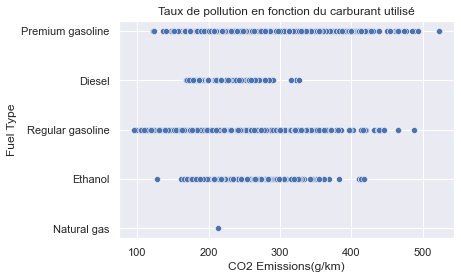

In [83]:
# CO2 Emissions en g/km

df["Fuel Type"] = df["Fuel Type"].replace(to_replace = ["Z", "D", "X", "E", "N"], value=["Premium gasoline","Diesel","Regular gasoline","Ethanol","Natural gas"])
sns.scatterplot(x="CO2 Emissions(g/km)", y="Fuel Type", data= df)
plt.title('Taux de pollution en fonction du carburant utilisé')

# Les véhicules les plus polluants sont les véhicules utilisant du gasoil premium, gasoil ordinaire et l'éthanol.

## Taux de pollution par rapport aux nombres de cylindres du véhicule

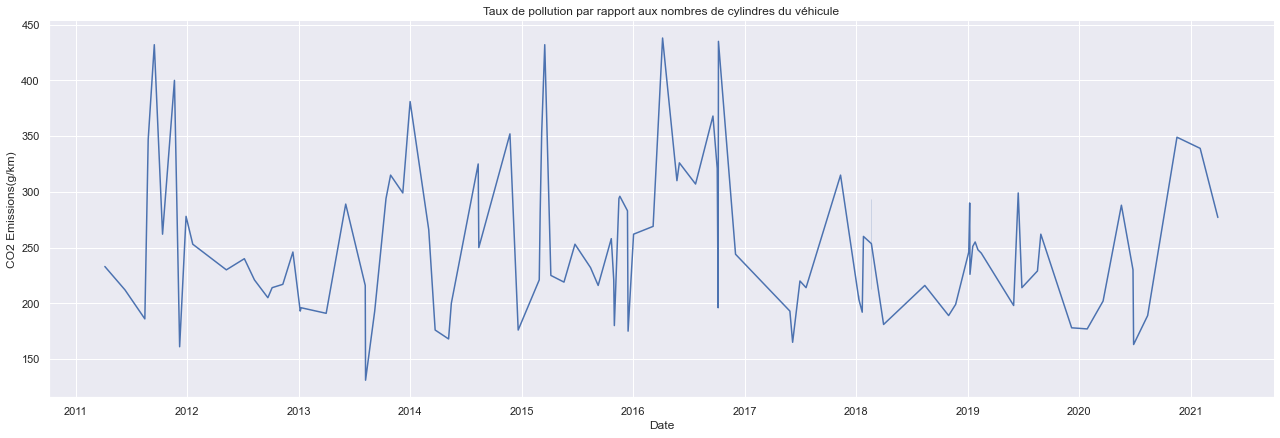

In [82]:
# CO2 Emissions en g/km

df['Date'] = pd.to_datetime(df['Date'])
co2 = df['CO2 Emissions(g/km)'].sample(100)
sns.relplot(x="Date", y=co2,data=df,kind="line").fig.set_size_inches(20,6)
plt.title('Taux de pollution par rapport aux nombres de cylindres du véhicule')
plt.show()

# Je n'avais pas de champ de date dans mon dataset par défaut, j'ai donc généré une colonne Date.
# Mais si on avait une colonne date avec les dates de mise en circulation des véhicules, on aurait pu voir la variation de l'émission de CO2 en fonction de l'année du véhicule.

## Carburant utilisé par les différents marques de voiture

Text(0.5, 1.0, 'Carburant utilisé par les différents marques de voiture')

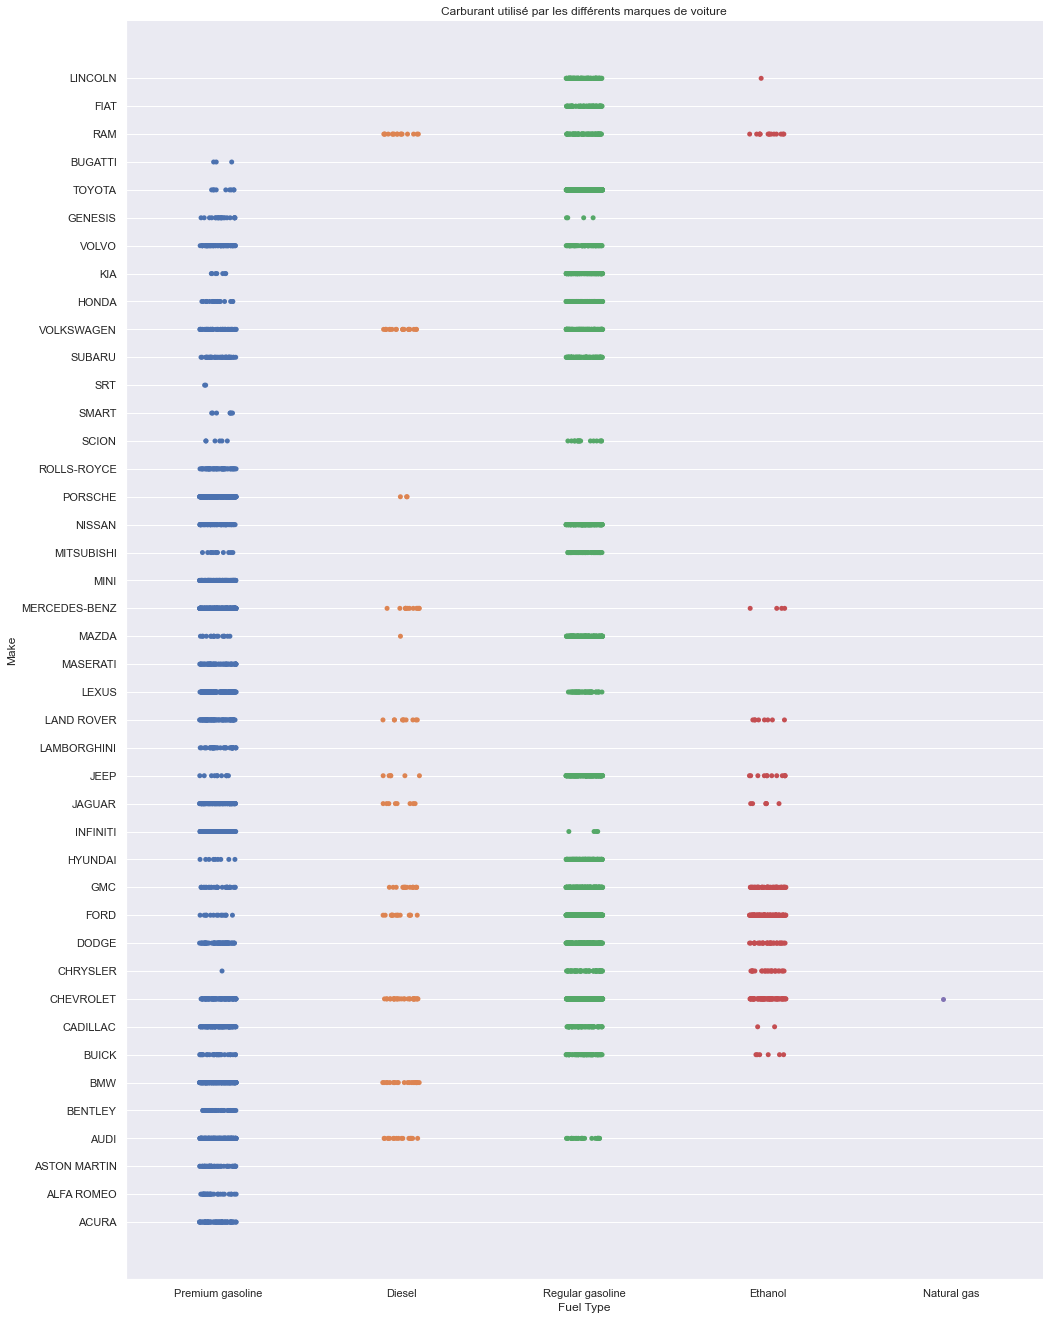

In [84]:
sns.catplot(x="Fuel Type",y="Make",data=df).fig.set_size_inches(20,20)
plt.title('Carburant utilisé par les différents marques de voiture')

# La plupart des constructeurs utilisent du gasoil comme carburant.

## Les différents types de véhicules

Text(0.5, 1.0, 'Les différents types de véhicules')

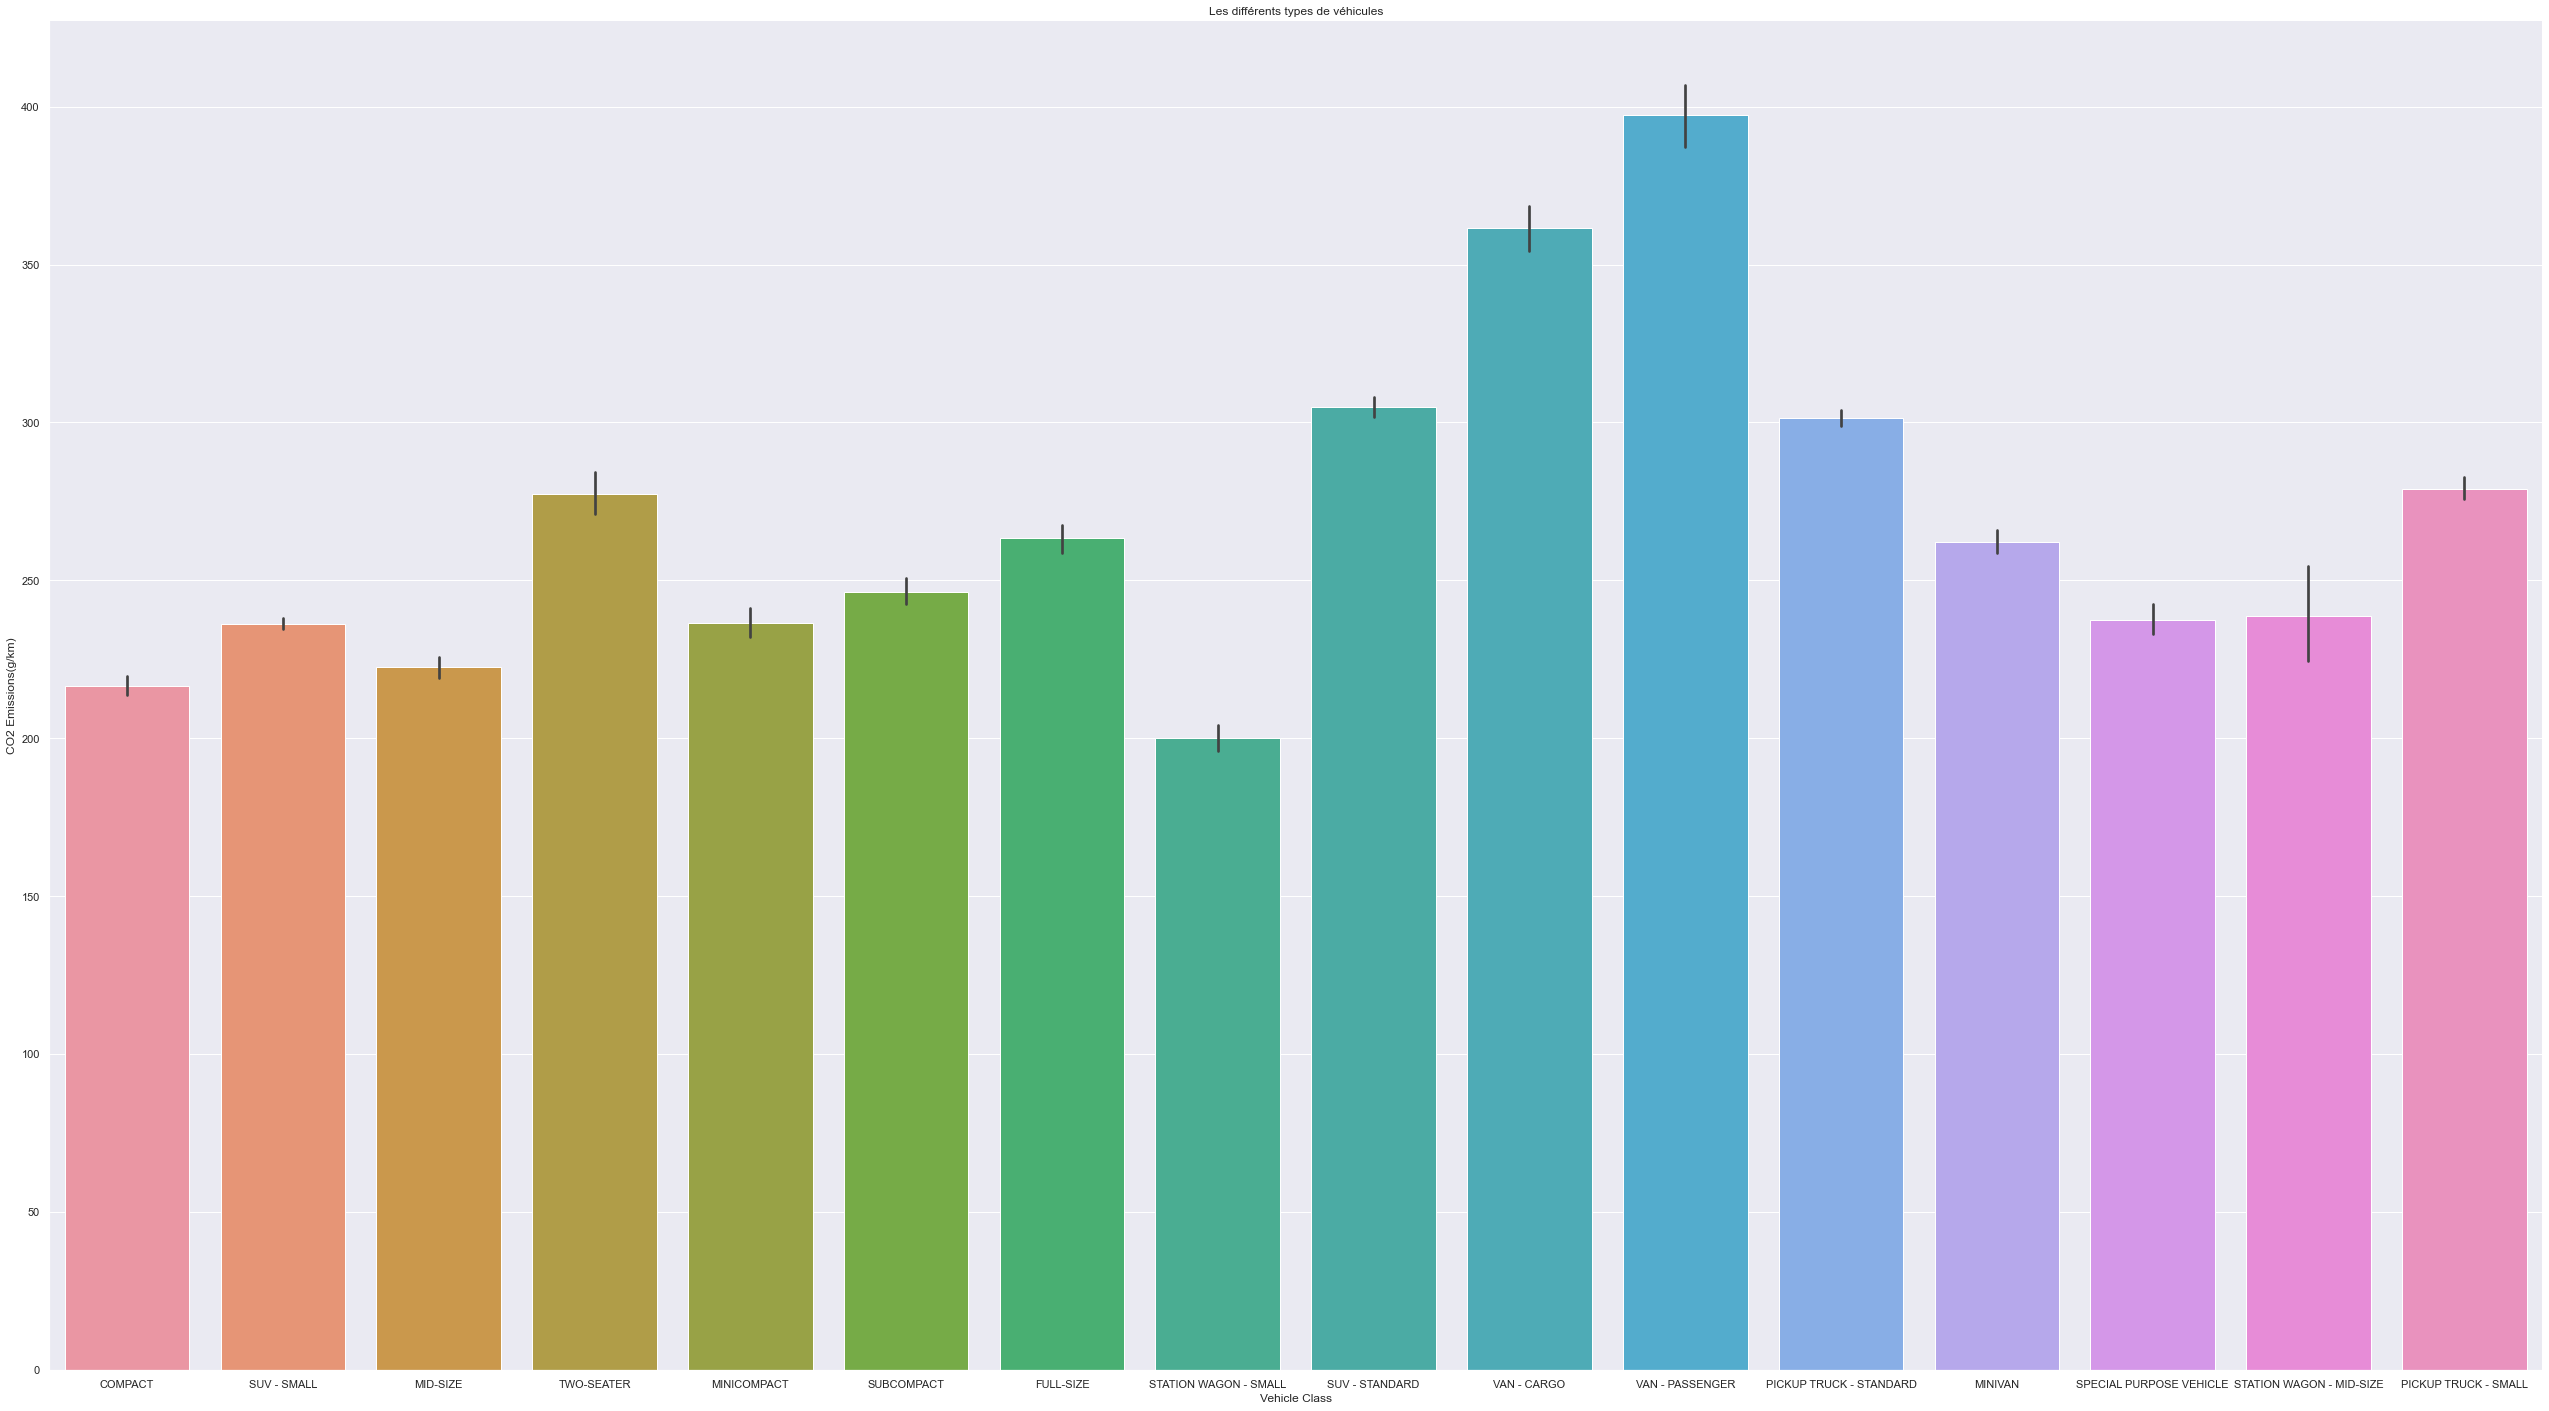

In [86]:
sns.catplot(x="Vehicle Class",y="CO2 Emissions(g/km)",data=df,kind="bar", height=10).fig.set_size_inches(40,20)
plt.title('Les différents types de véhicules')

# On peut voir que les SUV, Vans et Pickup sont les véhicules les plus polluant.

## L'émission de CO2 par rapport au carburant utilisé

Text(0.5, 1.0, "L'émission de CO2 par rapport au carburant utilisé")

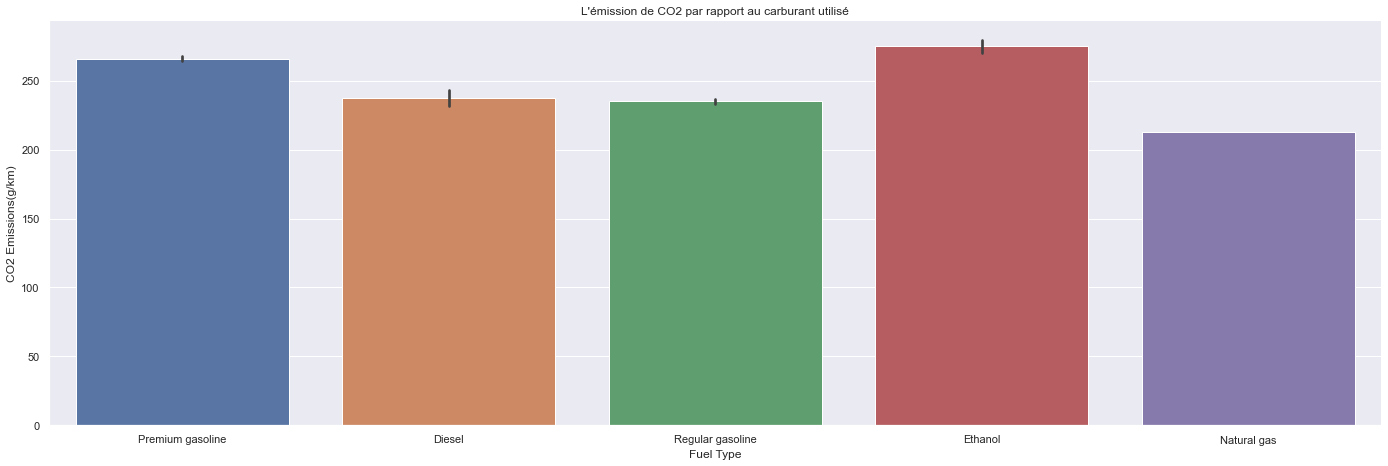

In [85]:
sns.catplot(x="Fuel Type",y="CO2 Emissions(g/km)",data=df,kind="bar", height=10).fig.set_size_inches(20,6)
plt.title("L'émission de CO2 par rapport au carburant utilisé")

# On constate que l'éthanol est le carburant le plus polluant.

## Boîte à moustaches

Text(0.5, 1.0, 'Boîte à moustaches')

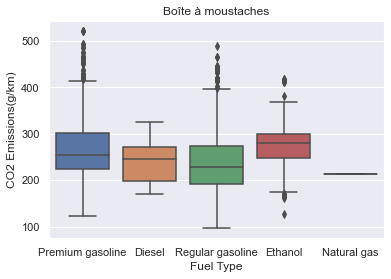

In [87]:
sns.boxplot(x="Fuel Type",y="CO2 Emissions(g/km)",data=df)
plt.title('Boîte à moustaches')

## Filtrage des données aberrantes de la boîte à moustaches

Text(0.5, 1.0, 'Filtrage des données aberrantes de la boîte à moustaches')

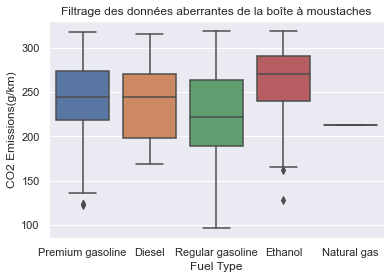

In [88]:
sns.boxplot(x="Fuel Type",y="CO2 Emissions(g/km)",data=df[(df["CO2 Emissions(g/km)"]<320)])
plt.title('Filtrage des données aberrantes de la boîte à moustaches')

# On peut voir que l'indice varie entre 100 et 350 d'émissions de CO2.
# Les résultats montrent que 50% de ceux qui utilisent du gasoil premium émettent plus de 250g/km de CO2
# Les valeurs qu'on peut observer à l'extérieur des moustaches sont des valeur aberrantes

## Matrice de corrélation du dataset

In [61]:
matrice = df.corr()
matrice

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


## Heatmap de la matrice de corrélation

<AxesSubplot:>

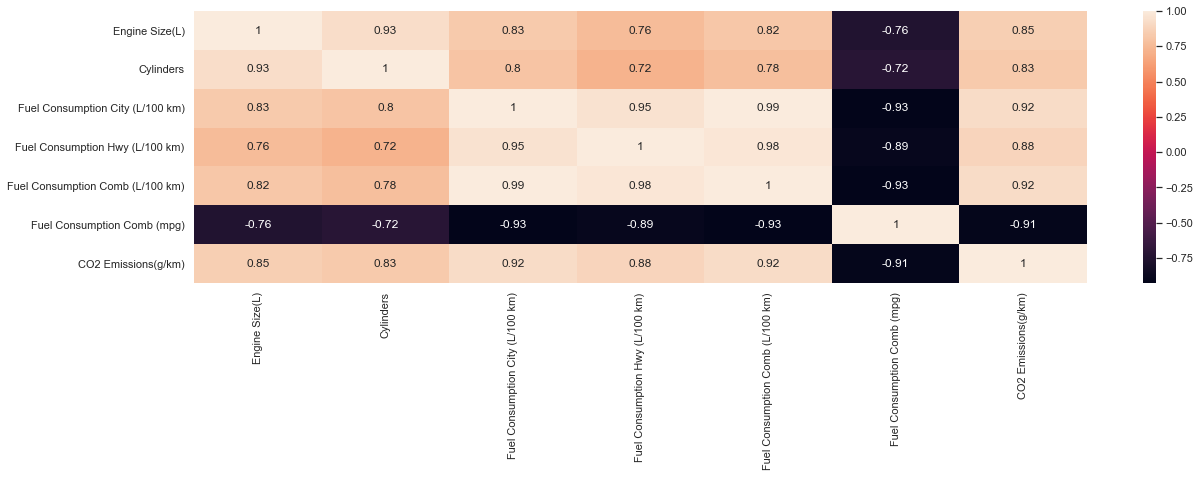

In [62]:
f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(matrice, annot=True, ax =ax)
plt.title('')

# On constate que les voitures qui polluent sont les voitures avec plusieurs cylindres et ceux qui consomment beaucoup de carburant.